Plot the results of $\xi_{dd}, \xi_{dd,s}, \xi_{vv}$

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from hankel import HankelTransform
from scipy.interpolate import InterpolatedUnivariateSpline as spline 
path ='/Users/ngoc/Desktop/Master-study/project'

In [2]:

#cosmological parameters
z        = 0.306                   #redshift
f        = 0.687255861             #growth rate
Omg_lamb = 0.685                   #dark energy density parameter
Omg_m    = 1. - Omg_lamb           #matter density parameter
a        = 1./(1. + z)             #scale factor
E_a      = np.sqrt(Omg_m*(1.+z)**3. + Omg_lamb) 
b        = 3.11                                 #bias for halo b = \delta_halo/\delta_matter
beta     = f/b                                  #linear RSD parameter
#relation between the real and redshift space power spectrum multipoles (Kaiser's coefficients)
K0       = 1 + 2/3*beta + 1/5*beta**2
K2       = 4/3*beta + 4/7*beta**2
K4       = 8/35*beta**2


The simulation results from Corrfunc

In [25]:
# density auto-correlation in redshift space, monopole
r_dd0_s        = np.loadtxt(path+'/my-p-code/xi_dd_redshiftspace_mono.txt', usecols = 0)
xi_dd0_s       = np.loadtxt(path+'/my-p-code/xi_dd_redshiftspace_mono.txt', usecols = 1)
error_xi_dd0_s = np.loadtxt(path+'/my-p-code/xi_dd_redshiftspace_mono.txt', usecols = 2)

# density auto-correlation in redshift space, quadrupole
r_dd2_s        = np.loadtxt(path+'/my-p-code/xi_dd_redshiftspace_quad.txt', usecols = 0)
xi_dd2_s       = np.loadtxt(path+'/my-p-code/xi_dd_redshiftspace_quad.txt', usecols = 1)
error_xi_dd2_s = np.loadtxt(path+'/my-p-code/xi_dd_redshiftspace_quad.txt', usecols = 2)

#velocity auto-correlation in realspace, monopole
r_vv0        = np.loadtxt(path+'/my-p-code/xi_vv_realspace_mono.txt', usecols = 0)
xi_vv0       = np.loadtxt(path+'/my-p-code/xi_vv_realspace_mono.txt', usecols = 1)
error_xi_vv0 = np.loadtxt(path+'/my-p-code/xi_vv_realspace_mono.txt', usecols = 2)

#velocity auto-correlation in realspace, quadrupole
r_vv2        = np.loadtxt(path+'/my-p-code/xi_vv_realspace_quad.txt', usecols = 0)
xi_vv2       = np.loadtxt(path+'/my-p-code/xi_vv_realspace_quad.txt', usecols = 1)
error_xi_vv2 = np.loadtxt(path+'/my-p-code/xi_vv_realspace_quad.txt', usecols = 2)

#velocity auto-correlation in redshiftspace, monopole
r_vv0s        = np.loadtxt(path+'/my-p-code/xi-vv0s.txt', usecols = 0)
xi_vv0s       = np.loadtxt(path+'/my-p-code/xi-vv0s.txt', usecols = 1)
error_xi_vv0s = np.loadtxt(path+'/my-p-code/xi-vv0s.txt', usecols = 2)

#velocity auto-correlation in redshiftspace, quadrupole
r_vv2s        = np.loadtxt(path+'/my-p-code/xi-vv2s.txt', usecols = 0)
xi_vv2s       = np.loadtxt(path+'/my-p-code/xi-vv2s.txt', usecols = 1)
error_xi_vv2s = np.loadtxt(path+'/my-p-code/xi-vv2s.txt', usecols = 2)


The simulation results from my F-corrfunc

In [26]:
# density auto-correlation monopole, redshift space
r_s              = np.loadtxt(path+'/my-f-code/results/xi-ddsmu0-F.txt', usecols = (0))
xi_dd0_s_f       = np.loadtxt(path+'/my-f-code/results/xi-ddsmu0-F.txt', usecols = (1))
error_xi_dd0_s_f = np.loadtxt(path+'/my-f-code/results/xi-ddsmu0-F.txt', usecols = (2))

# density auto-correlation quadrupole, redshift space
xi_dd2_s_f       = np.loadtxt(path+'/my-f-code/results/xi-ddsmu2-F.txt', usecols = (1))
error_xi_dd2_s_f = np.loadtxt(path+'/my-f-code/results/xi-ddsmu2-F.txt', usecols = (2))

# velocity auto-correlation monopole, real space
r_vv           = np.loadtxt(path+'/my-f-code/results/xi-vv0-F.txt', usecols =(0))
xi_vv0_f       = np.loadtxt(path+'/my-f-code/results/xi-vv0-F.txt', usecols =(1))
error_xi_vv0_f = np.loadtxt(path+'/my-f-code/results/xi-vv0-F.txt', usecols =(2))

# velocity auto-correlation quadrupole, real space
xi_vv2_f       = np.loadtxt(path+'/my-f-code/results/xi-vv2-F.txt', usecols =(1))
error_xi_vv2_f = np.loadtxt(path+'/my-f-code/results/xi-vv2-F.txt', usecols =(2))

# velocity auto-correlation monopole, redshift space
r_vv0s_f        = np.loadtxt(path+'/my-f-code/results/xi-vv0s-F.txt', usecols =(0))
xi_vv0s_f       = np.loadtxt(path+'/my-f-code/results/xi-vv0s-F.txt', usecols =(1))
error_xi_vv0s_f = np.loadtxt(path+'/my-f-code/results/xi-vv0s-F.txt', usecols =(2))

# velocity auto-correlation quadrupole, redshift space
xi_vv2s_f       = np.loadtxt(path+'/my-f-code/results/xi-vv2s-F.txt', usecols =(1))
error_xi_vv2s_f = np.loadtxt(path+'/my-f-code/results/xi-vv2s-F.txt', usecols =(2))



Theoretical results

In [27]:
# density auto-correlation in redshiftspace, theory, Fortran code 
xi_dd0_th = np.loadtxt(path+'/my-f-code/results/xi-dd0-th.txt', usecols=(1))
xi_dd0_th *= K0*b**2
xi_dd2_th = np.loadtxt(path+'/my-f-code/results/xi-dd2-th.txt', usecols=(1))
xi_dd2_th *= K2*b**2

# velocity auto-correlation in realspace, theory, Fortran code
xi_vv0_th = np.loadtxt(path+'/my-f-code/results/xi-vv0-th-test.txt', usecols=(1))
xi_vv0_th *= f**2/3
xi_vv2_th = np.loadtxt(path+'/my-f-code/results/xi-vv2-th-test.txt', usecols=(1))
xi_vv2_th *= -2/3*f**2

Theory cut-off at $k_{min} = \frac{2\pi}{boxsize}$ 

In [36]:
# density auto-correlation in redshiftspace, theory, Fortran code 
xi_dd0_th_cut = np.loadtxt(path+'/my-f-code/results/xi-dd0-th-cut.txt', usecols=(1))
xi_dd0_th_cut *= K0*b**2
xi_dd2_th_cut = np.loadtxt(path+'/my-f-code/results/xi-dd2-th-cut.txt', usecols=(1))
xi_dd2_th_cut *= K2*b**2

# velocity auto-correlation in realspace, theory, Fortran code
xi_vv0_th_cut = np.loadtxt(path+'/my-f-code/results/xi-vv0-th-cut.txt', usecols=(1))
xi_vv0_th_cut *= f**2/3
xi_vv2_th_cut = np.loadtxt(path+'/my-f-code/results/xi-vv2-th-cut.txt', usecols=(1))
xi_vv2_th_cut *= -2/3*f**2

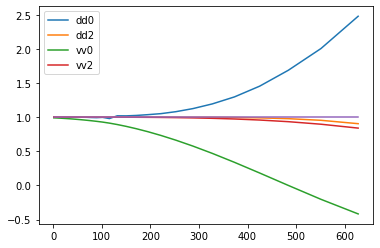

In [52]:
y   = np.full_like(r_vv,1)
plt.plot(r_s,xi_dd0_th_cut/xi_dd0_th,label='dd0')
plt.plot(r_s,xi_dd2_th_cut/xi_dd2_th,label='dd2')
plt.plot(r_s,xi_vv0_th_cut/xi_vv0_th,label='vv0')
plt.plot(r_s,xi_vv2_th_cut/xi_vv2_th,label='vv2')
plt.plot(r_s,y,'-')
#plt.ylim(0.99,1.05)
plt.legend()

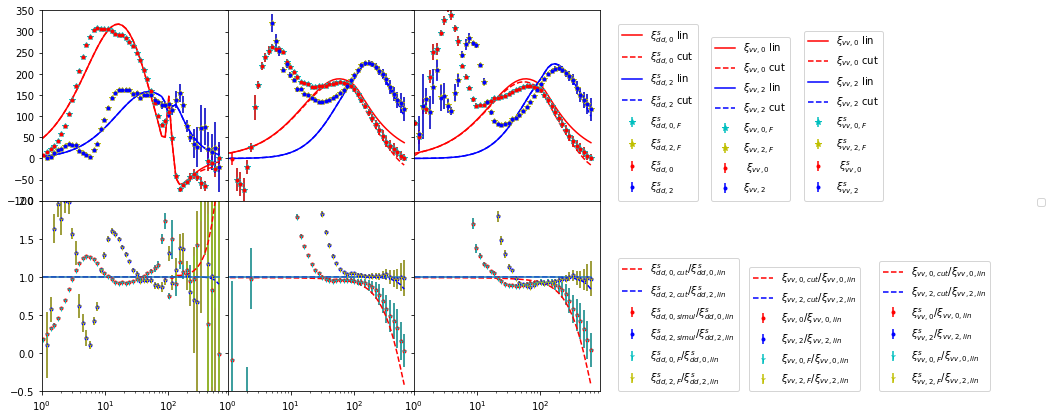

In [48]:
#plot F-corrfunc with results from Linear theory, theory cut, Corrfunc
y   = np.full_like(r_vv,1)
fig = plt.figure(figsize=(10,7))
gs  = fig.add_gridspec(2, 3, hspace=0, wspace=0)
(ax1, ax2 , ax5), (ax3, ax4, ax6) = gs.subplots(sharex='col', sharey='row')

#density auto-correlation in redshift space
ax1.errorbar(r_s, xi_dd0_s_f*r_s**2, fmt = 'c*', yerr = error_xi_dd0_s_f*r_s**2, label ='$\\xi_{dd,0,F}^s$')
ax1.errorbar(r_s, -xi_dd2_s_f*r_s**2, fmt = 'y*', yerr = error_xi_dd2_s_f*r_s**2, label ='$\\xi_{dd,2,F}^s$')
ax1.semilogx(r_dd0_s, xi_dd0_th*r_dd0_s**2, 'r',label='$\\xi_{dd,0}^s$ lin')
ax1.semilogx(r_dd0_s, xi_dd0_th_cut*r_dd0_s**2, 'r--',label='$\\xi_{dd,0}^s$ cut')
ax1.errorbar(r_dd0_s, xi_dd0_s*r_dd0_s**2, fmt = 'r.', yerr = error_xi_dd0_s*r_dd0_s**2, label ='$\\xi_{dd,0}^s$ ')
ax1.semilogx(r_dd2_s, -xi_dd2_th*r_dd2_s**2, 'b', label='$\\xi_{dd,2}^s$ lin')
ax1.semilogx(r_dd2_s, -xi_dd2_th_cut*r_dd2_s**2, 'b--', label='$\\xi_{dd,2}^s$ cut')
ax1.errorbar(r_dd2_s, -xi_dd2_s*r_dd2_s**2, fmt = 'b.', yerr = error_xi_dd2_s*r_dd2_s**2, label ='$\\xi_{dd,2}^s$ ')
ax1.set_ylim(-100,350)
#ax1.set_ylabel('$\\xi_{dd,l}^s.r^2$')
ax1.set_xlim(1,)
ax1.legend(loc=(3.1,0))

# plot the ratio of density auto-correlation/theory
ax3.errorbar(r_dd0_s,  xi_dd0_s/xi_dd0_th, fmt = 'r.', yerr = error_xi_dd0_s/xi_dd0_th,label ='$\\xi^s_{dd,0,simul}/\\xi^s_{dd,0,lin}$')
ax3.errorbar(r_dd2_s,  xi_dd2_s/xi_dd2_th, fmt = 'b.', yerr = error_xi_dd2_s/xi_dd2_th,label ='$\\xi^s_{dd,2,simul}/\\xi^s_{dd,2,lin}$')
ax3.plot(r_dd0_s,  xi_dd0_th_cut/xi_dd0_th, 'r--',label ='$\\xi^s_{dd,0,cut}/\\xi^s_{dd,0,lin}$')
ax3.plot(r_dd0_s,  xi_dd2_th_cut/xi_dd2_th, 'b--',label ='$\\xi^s_{dd,2,cut}/\\xi^s_{dd,2,lin}$')
ax3.errorbar(r_dd0_s,  xi_dd0_s_f/xi_dd0_th, fmt = 'c1', yerr = error_xi_dd0_s_f/xi_dd0_th,label ='$\\xi^s_{dd,0,F}/\\xi^s_{dd,0,lin}$')
ax3.errorbar(r_dd2_s,  xi_dd2_s_f/xi_dd2_th, fmt = 'y1', yerr = error_xi_dd2_s_f/xi_dd2_th,label ='$\\xi^s_{dd,2,F}/\\xi^s_{dd,2,lin}$')
ax3.legend(loc=(3.1,0))
ax3.plot(r_dd0_s,y)

#velocity auto-correlation in realspace
ax2.errorbar(r_vv, xi_vv0_f*r_vv, fmt = 'c*', yerr = error_xi_vv0_f*r_vv, label ='$\\xi_{vv,0,F}$')
ax2.errorbar(r_vv, -xi_vv2_f*r_vv, fmt = 'y*', yerr = error_xi_vv2_f*r_vv, label ='$\\xi_{vv,2,F}$')
ax2.semilogx(r_vv0, xi_vv0_th*r_vv0,'r', label='$\\xi_{vv,0}$ lin')
ax2.semilogx(r_vv0, xi_vv0_th_cut*r_vv0,'r--', label='$\\xi_{vv,0}$ cut')
ax2.errorbar(r_vv0, xi_vv0*r_vv0, fmt = 'r.', yerr = error_xi_vv0*r_vv0, label =' $\\xi_{vv,0}$ ')
ax2.semilogx(r_vv2, -xi_vv2_th*r_vv2, 'b',label='$\\xi_{vv,2}$ lin')
ax2.semilogx(r_vv0, -xi_vv2_th_cut*r_vv0,'b--', label='$\\xi_{vv,2}$ cut')
ax2.errorbar(r_vv2, -xi_vv2*r_vv2, fmt = 'b.', yerr = error_xi_vv2*r_vv2, label ='$\\xi_{vv,2}$')
#ax2.set_ylabel('$\\xi_{vv,l}.r^2$')
ax2.legend(loc=(2.6,0))

# plot the ratio of velocity auto-correlation/theory
ax4.errorbar(r_vv0, xi_vv0/xi_vv0_th, fmt='r.', yerr = error_xi_vv0/xi_vv0_th,label ='$\\xi_{vv,0}/\\xi_{vv,0,lin}$')
ax4.errorbar(r_vv2, xi_vv2/xi_vv2_th, fmt = 'b.', yerr = error_xi_vv2/xi_vv2_th,label ='$\\xi_{vv,2}/\\xi_{vv,2,lin}$')
ax4.plot(r_vv0, xi_vv0_th_cut/xi_vv0_th, 'r--',label ='$\\xi_{vv,0,cut}/\\xi_{vv,0,lin}$')
ax4.plot(r_vv0, xi_vv2_th_cut/xi_vv2_th, 'b--',label ='$\\xi_{vv,2,cut}/\\xi_{vv,2,lin}$')
ax4.errorbar(r_vv0, xi_vv0_f/xi_vv0_th, fmt='c1', yerr = error_xi_vv0_f/xi_vv0_th,label ='$\\xi_{vv,0,F}/\\xi_{vv,0,lin}$')
ax4.errorbar(r_vv2, xi_vv2_f/xi_vv2_th, fmt = 'y1', yerr = error_xi_vv2_f/xi_vv2_th,label ='$\\xi_{vv,2,F}/\\xi_{vv,2,lin}$')
ax4.plot(r_vv0,y)
#ax4.set_ylim(0,2)
ax4.set_xlim(1,)
ax4.legend(loc=(2.8,0))

#velocity auto-correaltion in redshift space
ax5.errorbar(r_vv0s, xi_vv0s_f*r_vv0s, fmt = 'c*', yerr = error_xi_vv0s_f*r_vv0s, label ='$\\xi_{vv,0,F}^s$')
ax5.errorbar(r_vv0s, -xi_vv2s_f*r_vv0s, fmt = 'y*', yerr = error_xi_vv2s_f*r_vv2s, label ='$\\xi_{vv,2,F}^s$')
ax5.semilogx(r_vv0s, xi_vv0_th*r_vv0s,'r', label='$\\xi_{vv,0}$ lin')
ax5.semilogx(r_vv0s, xi_vv0_th_cut*r_vv0,'r--', label='$\\xi_{vv,0}$ cut')
ax5.errorbar(r_vv0s, xi_vv0s*r_vv0s, fmt = 'r.', yerr = error_xi_vv0s*r_vv0s, label =' $\\xi_{vv,0}^s$ ')
ax5.semilogx(r_vv2s, -xi_vv2_th*r_vv2s, 'b',label='$\\xi_{vv,2}$ lin')
ax5.semilogx(r_vv0s, -xi_vv2_th_cut*r_vv0,'b--', label='$\\xi_{vv,2}$ cut')
ax5.errorbar(r_vv2s, -xi_vv2s*r_vv2s, fmt = 'b.', yerr = error_xi_vv2s*r_vv2s, label ='$\\xi_{vv,2}^s$')
#ax5.set_ylabel('$\\xi_{vv,l}.r^2$')
ax5.legend(loc=(2.1,0))

# plot the ratio of velocity auto-correlation in redshift space/theory
ax6.errorbar(r_vv0s, xi_vv0s/xi_vv0_th, fmt='r.', yerr = error_xi_vv0s/xi_vv0_th,label ='$\\xi_{vv,0}^s/\\xi_{vv,0,lin}$')
ax6.errorbar(r_vv2s, xi_vv2s/xi_vv2_th, fmt = 'b.', yerr = error_xi_vv2s/xi_vv2_th,label ='$\\xi_{vv,2}^s/\\xi_{vv,2,lin}$')
ax6.plot(r_vv0s, xi_vv0_th_cut/xi_vv0_th, 'r--',label ='$\\xi_{vv,0,cut}/\\xi_{vv,0,lin}$')
ax6.plot(r_vv0s, xi_vv2_th_cut/xi_vv2_th, 'b--',label ='$\\xi_{vv,2,cut}/\\xi_{vv,2,lin}$')
ax6.errorbar(r_vv0s, xi_vv0s_f/xi_vv0_th, fmt='c1', yerr = error_xi_vv0s_f/xi_vv0_th,label ='$\\xi_{vv,0,F}^s/\\xi_{vv,0,lin}$')
ax6.errorbar(r_vv2s, xi_vv2s_f/xi_vv2_th, fmt = 'y1', yerr = error_xi_vv2s_f/xi_vv2_th,label ='$\\xi_{vv,2,F}^s/\\xi_{vv,2,lin}$')
ax6.plot(r_vv0s,y)
ax6.set_ylim(-0.5,2)
ax6.set_xlim(1,)
ax6.legend(loc=(2.5,0))

leg = fig.legend('', loc = 'center left', bbox_to_anchor = (1.5, 0.5))
#plt.savefig('plot_ratio_dds_vv_vvs.png',bbox_inches='tight')